In [39]:
FIG_DIR='.\\reports'
EXPORT_PATH    = ".\\data"

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import os
import plotly.graph_objects as go
import pickle

In [3]:
df = pd.read_csv('.\\data\\wisconsin_data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(['id','Unnamed: 32'],axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#check null values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
df['diagnosis']=df['diagnosis'].map({'M':1, 'B':0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

M =212 and B =357


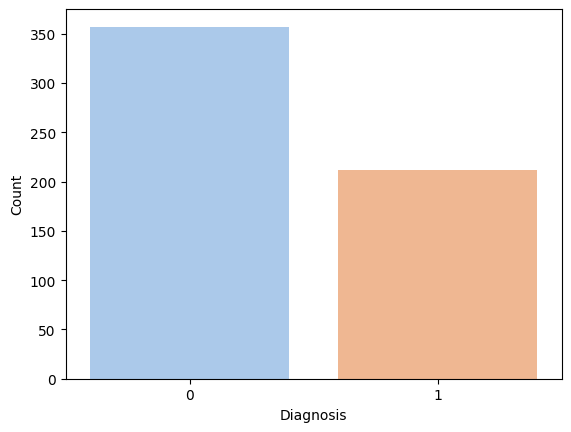

In [9]:
#check if data is balanced
M=(df['diagnosis']==1).sum()
B=(df['diagnosis']==0).sum()
print(f'M ={M} and B ={B}')

#visualization
sns.countplot(data=df, x='diagnosis',palette='pastel')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.show()

In [10]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
#standardization needed

In [12]:
X=df.drop('diagnosis', axis=1 )
#check for outliers 
fig = px.box(X)

fig.update_layout(
    title="Boxplot of the dataset",
    xaxis_title="Variables",
    yaxis_title="Values"
)

fig.show()
fig.write_html(os.path.join(FIG_DIR, 'box_plot.html'))

In [13]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [15]:
#check for outliers
fig = px.box(X_scaled_df)

fig.update_layout(
    title="Boxplot of standardized data",
    xaxis_title="Variables",
    yaxis_title="Values"
)

fig.show()
fig.write_html(os.path.join(FIG_DIR, 'standardized_box_plot.html'))


In [16]:
X_scaled_df.shape

(569, 30)

In [17]:
#calculate the IQR for each column
Q1 = X_scaled_df.quantile(0.25)
Q3 = X_scaled_df.quantile(0.75)
IQR = Q3 - Q1

threshold = 3

#filter out the outliers from each column
df_no_outliers = X_scaled_df[~((X_scaled_df < (Q1 - threshold * IQR)) | (X_scaled_df > (Q3 + threshold * IQR))).any(axis=1)]


In [18]:
df_no_outliers.shape

(513, 30)

In [19]:
df_new = df_no_outliers.copy()  # Create a copy of df_no_outliers to df_new
df_new['diagnosis'] = df['diagnosis']

In [20]:
y=df_new['diagnosis']

In [21]:
#check for outliers
fig = px.box(df_no_outliers)

fig.update_layout(
    title="Boxplot of cleaned data",
    xaxis_title="Variables",
    yaxis_title="Values"
)

fig.show()
#fig.write_html(os.path.join(FIG_DIR, 'box_plot.html'))


In [22]:
#calculate the correlation matrix
correlation_matrix = df_no_outliers.corr()

fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                                x=correlation_matrix.columns,
                                y=correlation_matrix.index,
                                colorscale='tropic',  # Corrected colorscale name
                                ygap=1))


fig.update_layout(title='Correlation Heatmap')
fig.update_layout(width=900, height=900)
fig.show()


In [23]:
df_no_outliers

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,0.310345,2.636649,0.470844,0.176365,0.600616,1.977758,2.086645,1.170295,1.155090,1.236490,...,0.259021,2.786709,0.638572,0.060502,0.409050,3.418837,4.307272,1.842324,1.922319,3.156163
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [24]:

from sklearn.decomposition import PCA

X_std=df_no_outliers
y_std=y

num_components=10

pca = PCA(num_components)
X_pca = pca.fit_transform(X_std)

#df with the PCA results
columns_pca = [f'PC{i+1}' for i in range(num_components)]
df_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

df_pca['diagnosis'] = y_std.reset_index(drop=True)


In [25]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,2.936476,-3.669310,-1.051714,-0.980591,-0.314969,-0.023080,0.917129,0.345243,-0.144336,0.031906,1
1,6.224017,-0.910183,-0.491957,-1.431165,-0.380566,0.746239,-0.092103,0.127466,-0.122863,0.402441,1
2,4.116492,-1.871431,-0.546454,-3.780266,0.019004,-1.157033,0.280565,0.946537,-0.431640,0.276309,1
3,3.162500,4.443138,-2.275751,0.445805,-0.605436,0.048665,0.368934,-0.124575,0.529198,-0.294791,1
4,2.990830,-2.415266,-1.150427,0.397565,-0.793020,-0.149219,0.078720,0.152221,-0.012699,-0.073274,1
...,...,...,...,...,...,...,...,...,...,...,...
508,7.080994,3.306462,0.252154,4.025284,2.391802,1.300214,-0.651173,-0.164406,0.331030,0.082627,1
509,4.250610,-3.458808,3.504342,-0.156738,-0.768046,-0.359243,-0.051645,-1.007565,0.326626,-0.318412,1
510,1.931074,-2.072471,1.655971,1.045115,1.531616,-0.681497,-0.226028,0.153966,-0.755168,0.771107,1
511,11.168326,1.814607,0.781954,1.300648,0.548263,1.138162,0.415798,-0.459994,0.200958,0.228851,1


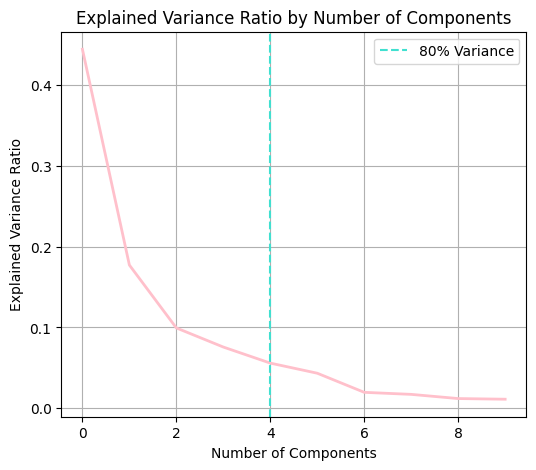

Number of components to explain 80% variance: 4


In [27]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

#find the index where the cumulative sum exceeds 80% variance
components_80_percent_variance = np.argmax(cumulative_variance_ratio >= 0.8) 

plt.figure(1, figsize=(6, 5))

plt.plot( explained_variance_ratio, linewidth=2, color='pink')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)

# Plot the 80% variance line
plt.axvline(x=components_80_percent_variance, color='turquoise', linestyle='--', label='80% Variance')
plt.legend()
plt.show()

print(f"Number of components to explain 80% variance: {components_80_percent_variance}")


In [38]:
df_pca4=df_pca.iloc[:,[0,1,2,3,-1]].copy()
df_pca4

,PC1,PC2,PC3,PC4,diagnosis
0,2.936476,-3.669310,-1.051714,-0.980591,1
1,6.224017,-0.910183,-0.491957,-1.431165,1
2,4.116492,-1.871431,-0.546454,-3.780266,1
3,3.162500,4.443138,-2.275751,0.445805,1
4,2.990830,-2.415266,-1.150427,0.397565,1
...,...,...,...,...,...
508,7.080994,3.306462,0.252154,4.025284,1
509,4.250610,-3.458808,3.504342,-0.156738,1
510,1.931074,-2.072471,1.655971,1.045115,1
511,11.168326,1.814607,0.781954,1.300648,1


In [ ]:
df_pca4.to_pickle((os.path.join(EXPORT_PATH, 'pca4_df.pkl')))
df_new.to_pickle((os.path.join(EXPORT_PATH, 'cleaned_std_df.pkl')))